In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data.csv")
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [3]:
print(pd.unique(df.RiskLevel))

['high risk' 'low risk' 'mid risk']


In [4]:
df.replace(["high risk", "mid risk", "low risk"], [3, 2, 1], inplace=True)
df['RiskLevel'] = df['RiskLevel'].astype(float)
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,3.0
1,35,140,90,13.0,98.0,70,3.0
2,29,90,70,8.0,100.0,80,3.0
3,30,140,85,7.0,98.0,70,3.0
4,35,120,60,6.1,98.0,76,1.0


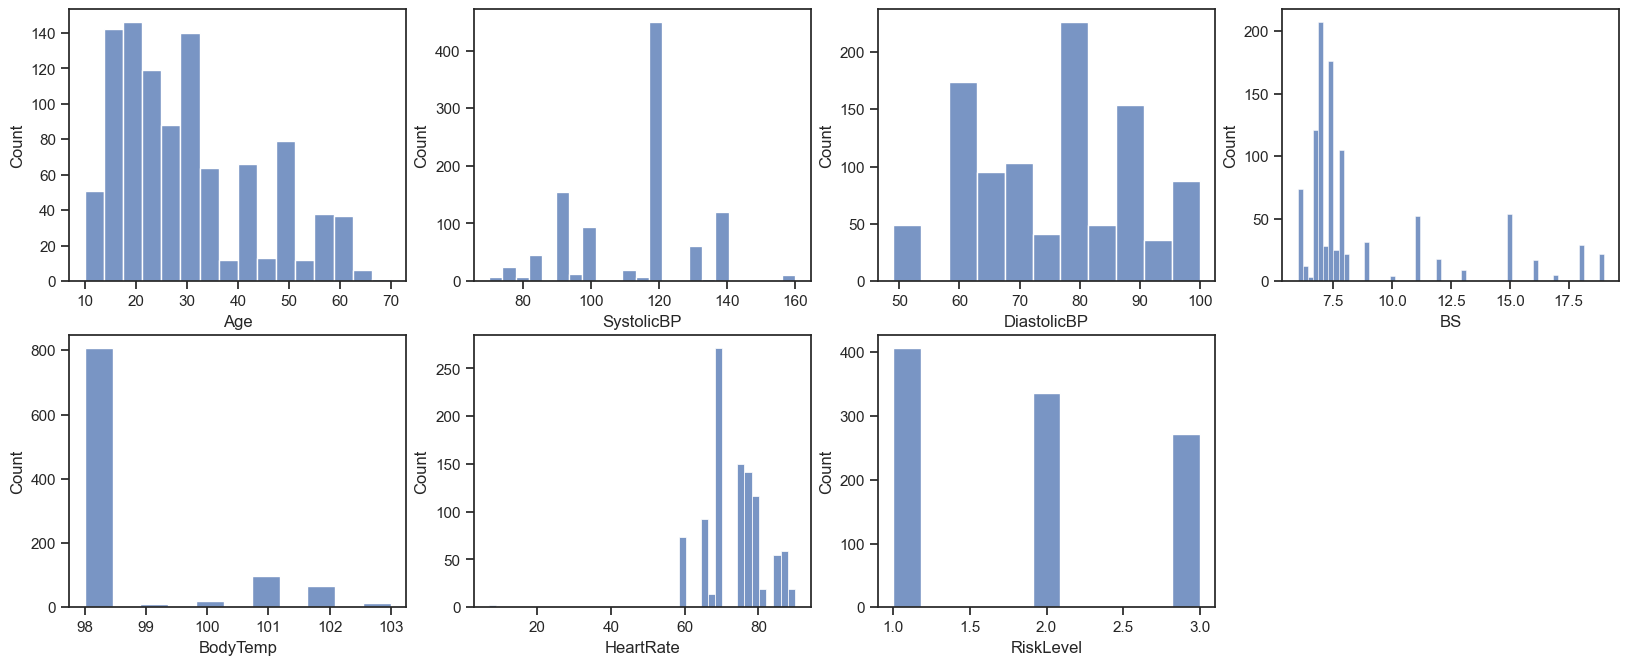

In [24]:
plt.figure(figsize=(20,12))
num=0
for column in df.columns: 
    num += 1
    plt.subplot(3,4,num)
    sns.histplot(data=df, x=column)
plt.show()

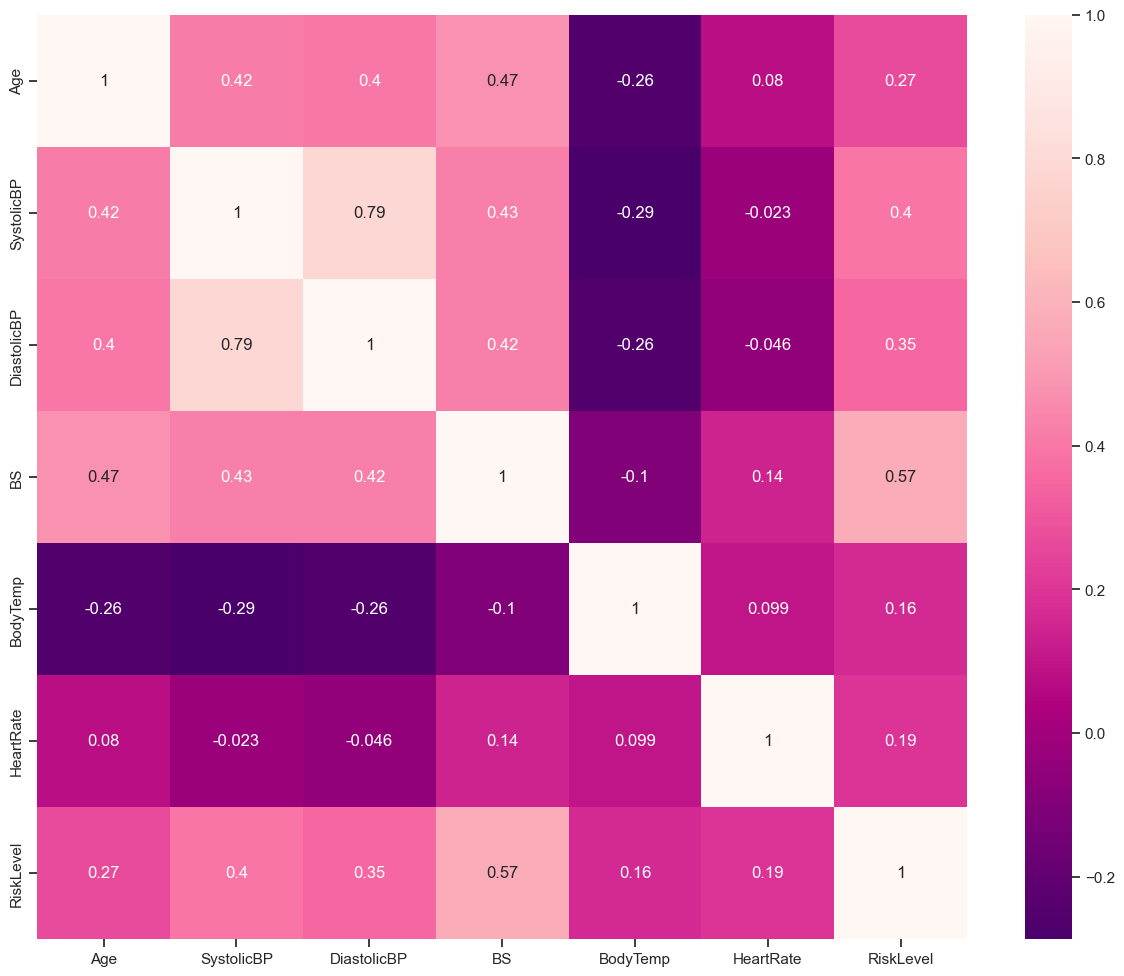

In [7]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True,cmap='RdPu_r')
plt.show()

In [8]:
x = np.array(df[df.columns[:6]].values)
y = np.array(df[df.columns[-1]].values)

print(f"x = {x}")
print(f"y = {y}")

x = [[ 25. 130.  80.  15.  98.  86.]
 [ 35. 140.  90.  13.  98.  70.]
 [ 29.  90.  70.   8. 100.  80.]
 ...
 [ 35.  85.  60.  19.  98.  86.]
 [ 43. 120.  90.  18.  98.  70.]
 [ 32. 120.  65.   6. 101.  76.]]
y = [3. 3. 3. ... 3. 3. 2.]


In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=25)

print(f"Number of training samples: {x_train.shape[0]}")
print(f"Number of test samples: {x_test.shape[0]}")

Number of training samples: 811
Number of test samples: 203


In [10]:
def print_grid_cv_results(grid_result):
    print(
        f"Best model score: {grid_result.best_score_} "
        f"Best model params: {grid_result.best_params_} "
    )
    means = grid_result.cv_results_["mean_test_score"]
    stds = grid_result.cv_results_["std_test_score"]
    params = grid_result.cv_results_["params"]

    for mean, std, param in zip(means, stds, params):
        mean = round(mean, 4)
        std = round(std, 4)
        print(f"{mean} (+/- {2 * std}) with: {param}")

### Classification examples (risk=categorical)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "n_neighbors": [3, 4, 5, 6],
    "weights": ["uniform", "distance"]
}

clf = KNeighborsClassifier()
gsc = GridSearchCV(clf, params)

grid_result = gsc.fit(x_train, y_train)
print_grid_cv_results(grid_result=grid_result)


Best model score: 0.7891009619025978 Best model params: {'n_neighbors': 3, 'weights': 'distance'} 
0.6904 (+/- 0.0484) with: {'n_neighbors': 3, 'weights': 'uniform'}
0.7891 (+/- 0.0508) with: {'n_neighbors': 3, 'weights': 'distance'}
0.6646 (+/- 0.03) with: {'n_neighbors': 4, 'weights': 'uniform'}
0.7768 (+/- 0.0696) with: {'n_neighbors': 4, 'weights': 'distance'}
0.656 (+/- 0.0582) with: {'n_neighbors': 5, 'weights': 'uniform'}
0.7854 (+/- 0.0484) with: {'n_neighbors': 5, 'weights': 'distance'}
0.6399 (+/- 0.0356) with: {'n_neighbors': 6, 'weights': 'uniform'}
0.7842 (+/- 0.0524) with: {'n_neighbors': 6, 'weights': 'distance'}


In [12]:
from sklearn.ensemble import RandomForestClassifier

params = {
    "n_estimators": [50, 100, 200, 300],
    "min_samples_split": [2, 3, 4, 5, 6]
}

clf = RandomForestClassifier()
gsc = GridSearchCV(clf, params)

grid_result = gsc.fit(x_train, y_train)
print_grid_cv_results(grid_result=grid_result)

Best model score: 0.831008104218738 Best model params: {'min_samples_split': 3, 'n_estimators': 100} 
0.8212 (+/- 0.0516) with: {'min_samples_split': 2, 'n_estimators': 50}
0.8162 (+/- 0.0772) with: {'min_samples_split': 2, 'n_estimators': 100}
0.8187 (+/- 0.0792) with: {'min_samples_split': 2, 'n_estimators': 200}
0.8261 (+/- 0.0652) with: {'min_samples_split': 2, 'n_estimators': 300}
0.8224 (+/- 0.0782) with: {'min_samples_split': 3, 'n_estimators': 50}
0.831 (+/- 0.0618) with: {'min_samples_split': 3, 'n_estimators': 100}
0.8248 (+/- 0.078) with: {'min_samples_split': 3, 'n_estimators': 200}
0.8248 (+/- 0.0666) with: {'min_samples_split': 3, 'n_estimators': 300}
0.8236 (+/- 0.051) with: {'min_samples_split': 4, 'n_estimators': 50}
0.8162 (+/- 0.0566) with: {'min_samples_split': 4, 'n_estimators': 100}
0.8137 (+/- 0.0632) with: {'min_samples_split': 4, 'n_estimators': 200}
0.8137 (+/- 0.0572) with: {'min_samples_split': 4, 'n_estimators': 300}
0.8175 (+/- 0.0618) with: {'min_samples_

In [13]:
random_forest_clf = RandomForestClassifier(min_samples_split=2, n_estimators=50)
random_forest_clf.fit(x_train, y_train)

print(f"Training score: {random_forest_clf.score(x_train, y_train)}")
print(f"Test score: {random_forest_clf.score(x_test, y_test)}")
y_pred = random_forest_clf.predict(x_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(f"Confusion matrix:\n{cm}")

Training score: 0.9321824907521579
Test score: 0.812807881773399
Confusion matrix:
[[68 20  1]
 [ 8 57  5]
 [ 0  4 40]]


### Compare prediction to truth

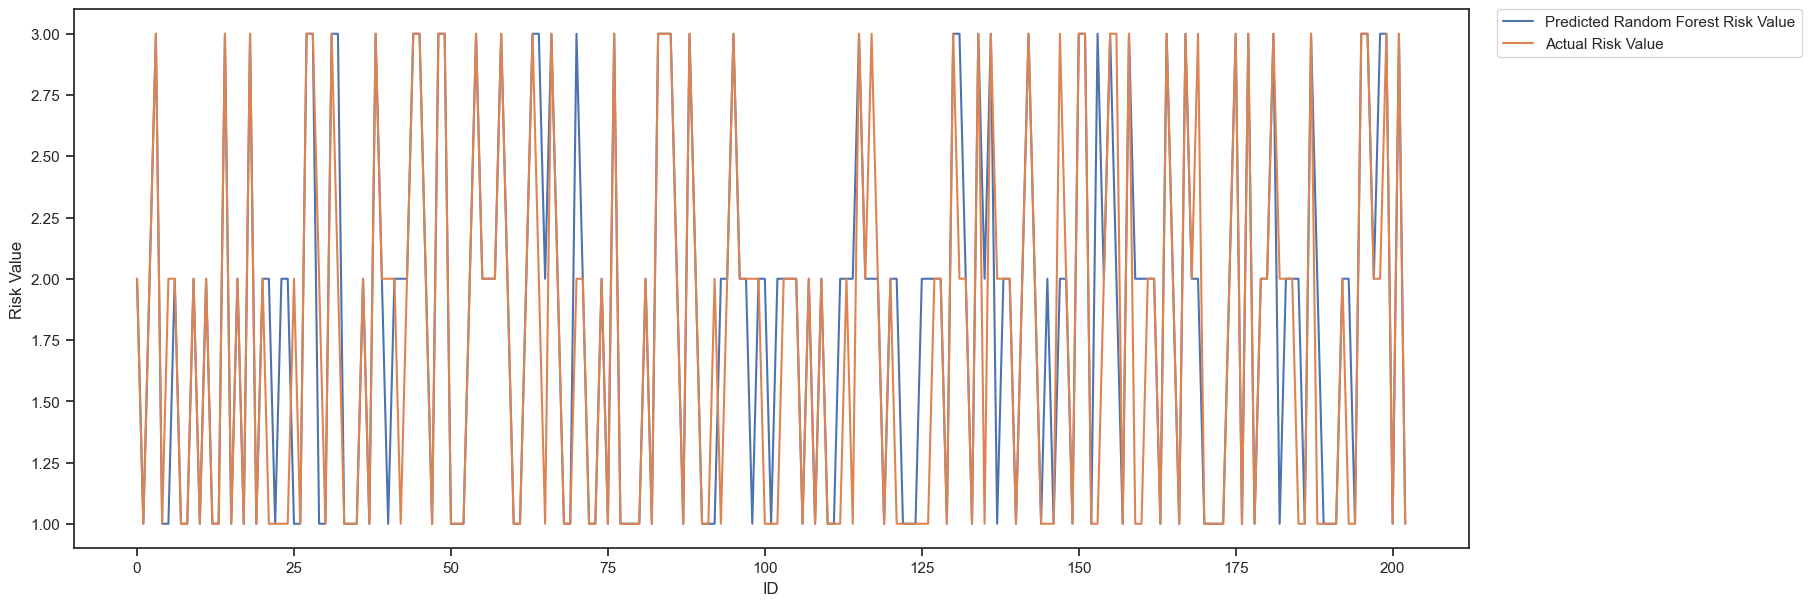

In [14]:
random_forest_result = pd.DataFrame({'Predicted risk': y_pred, 'Actual risk': y_test})

plt.figure(figsize=(18,7))
ax=sns.lineplot(x=np.arange(0,len(y_pred)),y=y_pred,label = 'Predicted Random Forest Risk Value')
ax = sns.lineplot(x=np.arange(0,len(y_test)),y=y_test,label = 'Actual Risk Value')
ax.set_xlabel('ID',fontsize=12)
ax.set_ylabel('Risk Value',fontsize=12)
prop3 = dict(boxstyle='round',facecolor='orange',alpha=0.5)
plt.legend(prop={'size':'15'})
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

### LightGBM

In [15]:
from lightgbm import LGBMClassifier

clf = LGBMClassifier(n_estimators=200)
clf.fit(x_train, y_train)

LGBMClassifier(n_estimators=200)

In [16]:
print(f"Test score: {clf.score(x_train, y_train)}")
print(f"Train score: {clf.score(x_test, y_test)}")

Test score: 0.9321824907521579
Train score: 0.8078817733990148


### Testing AutoML

In [17]:
from flaml import AutoML
automl = AutoML()
automl.fit(x_train, y_train, task="classification")

[flaml.automl.automl: 02-27 07:51:00] {2716} INFO - task = classification
[flaml.automl.automl: 02-27 07:51:00] {2718} INFO - Data split method: stratified
[flaml.automl.automl: 02-27 07:51:00] {2721} INFO - Evaluation method: cv
[flaml.automl.automl: 02-27 07:51:00] {2848} INFO - Minimizing error metric: log_loss
[flaml.automl.automl: 02-27 07:51:00] {2898} WARNING - No search budget is provided via time_budget or max_iter. Training only one model per estimator. Zero-shot AutoML is used for certain tasks and estimators. To tune hyperparameters for each estimator, please provide budget either via time_budget or max_iter.
[flaml.automl.automl: 02-27 07:51:00] {2994} INFO - List of ML learners in AutoML Run: ['rf', 'lgbm', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.automl: 02-27 07:51:00] {3323} INFO - iteration 0, current learner rf
[flaml.automl.automl: 02-27 07:51:17] {3461} INFO - Estimated sufficient time budget=10000s. Estimated necessary time budget=10s.
[fla

c:\Python\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Python\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Python\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Python\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Python\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 02-27 07:52:46] {3508} INFO -  at 106.0s,	estimator xgboost's best error=0.5232,	best estimator xgboost's best error=0.5232
[flaml.automl.automl: 02-27 07:52:46] {3323} INFO - iteration 3, current learner extra_tree
[flaml.automl.automl: 02-27 07:53:31] {3508} INFO -  at 151.6s,	estimator extra_tree's best error=1.5769,	best estimator xgboost's best error=0.5232
[flaml.automl.automl: 02-27 07:53:31] {3323} INFO - iteration 4, current learner xgb_limitdepth


c:\Python\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Python\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Python\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Python\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
c:\Python\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 02-27 07:53:35] {3508} INFO -  at 156.0s,	estimator xgb_limitdepth's best error=0.5360,	best estimator xgboost's best error=0.5232
[flaml.automl.automl: 02-27 07:53:35] {3323} INFO - iteration 5, current learner lrl1
[flaml.automl.automl: 02-27 07:53:36] {3508} INFO -  at 156.2s,	estimator lrl1's best error=0.8726,	best estimator xgboost's best error=0.5232


c:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Python\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Python\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 02-27 07:53:54] {3772} INFO - retrain xgboost for 18.7s
[flaml.automl.automl: 02-27 07:53:54] {3779} INFO - retrained model: XGBClassifier(base_score=None, booster=None, callbacks=[],
              colsample_bylevel=0.8815698870579244, colsample_bynode=None,
              colsample_bytree=0.7057137578225323, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy='lossguide',
              importance_type=None, interaction_constraints=None,
              learning_rate=0.002432260930606481, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=0, max_leaves=4,
              min_child_weight=0.7673654415794792, missing=nan,
              monotone_constraints=None, n_estimators=8315, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob',
              predictor=None, ...)
[flaml.a

### Regression example (risk=numerical)

In [18]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(x_train, y_train)

print(f"Training score for linear regression: {regr.score(x_train, y_train)}")

Training score for linear regression: 0.42981295732825164


In [19]:
from sklearn.ensemble import RandomForestRegressor

params = {
    "n_estimators": [50, 100, 200, 300],
    "min_samples_split": [2, 3, 4, 5, 6]
}

regr = RandomForestRegressor()
grid = GridSearchCV(regr, params, cv=3)
grid_result = grid.fit(x_train, y_train)

print_grid_cv_results(grid_result=grid_result)

Best model score: 0.677500747043534 Best model params: {'min_samples_split': 2, 'n_estimators': 300} 
0.6755 (+/- 0.0278) with: {'min_samples_split': 2, 'n_estimators': 50}
0.6744 (+/- 0.047) with: {'min_samples_split': 2, 'n_estimators': 100}
0.675 (+/- 0.0368) with: {'min_samples_split': 2, 'n_estimators': 200}
0.6775 (+/- 0.0324) with: {'min_samples_split': 2, 'n_estimators': 300}
0.6708 (+/- 0.0438) with: {'min_samples_split': 3, 'n_estimators': 50}
0.6735 (+/- 0.0298) with: {'min_samples_split': 3, 'n_estimators': 100}
0.6773 (+/- 0.0382) with: {'min_samples_split': 3, 'n_estimators': 200}
0.6757 (+/- 0.0332) with: {'min_samples_split': 3, 'n_estimators': 300}
0.6748 (+/- 0.0524) with: {'min_samples_split': 4, 'n_estimators': 50}
0.6717 (+/- 0.03) with: {'min_samples_split': 4, 'n_estimators': 100}
0.6758 (+/- 0.03) with: {'min_samples_split': 4, 'n_estimators': 200}
0.6688 (+/- 0.0366) with: {'min_samples_split': 4, 'n_estimators': 300}
0.6542 (+/- 0.0262) with: {'min_samples_spl

In [20]:
random_forest = RandomForestRegressor(min_samples_split = 2, n_estimators = 200)
random_forest.fit(x_train, y_train)
print(f"Training score of random forest regressor: {random_forest.score(x_train, y_train)}")

random_forest_predict = random_forest.predict(x_test)

random_forest_result = pd.DataFrame({'Predicted risk': random_forest_predict, 'Actual risk': y_test})
print(random_forest_result)
random_forest_result["Index"] = random_forest_result.index

Training score of random forest regressor: 0.897546926136006
     Predicted risk  Actual risk
0          1.840206          2.0
1          1.001667          1.0
2          2.000000          2.0
3          3.000000          3.0
4          1.060000          1.0
..              ...          ...
198        2.858631          2.0
199        2.356930          3.0
200        1.064375          1.0
201        3.000000          3.0
202        1.001000          1.0

[203 rows x 2 columns]


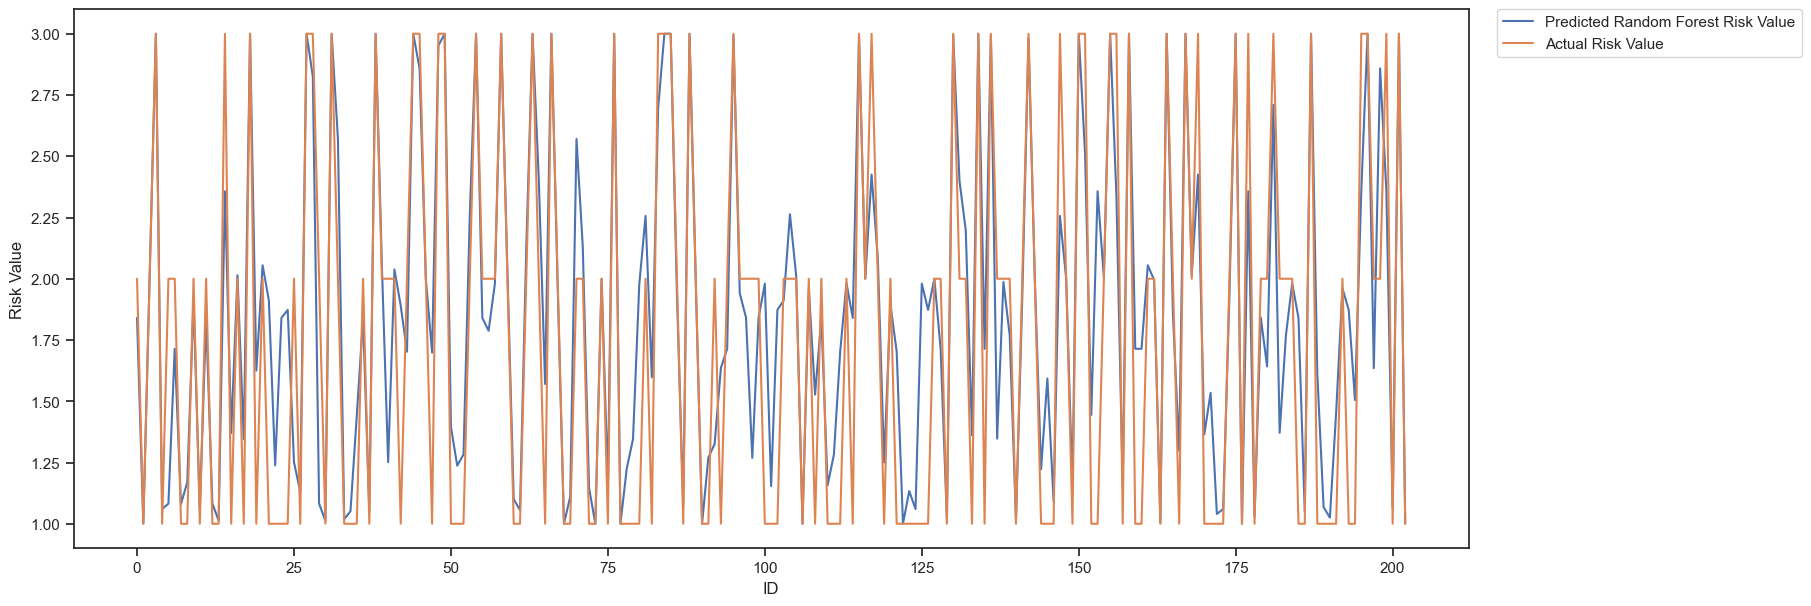

In [21]:
plt.figure(figsize=(18,7))
ax=sns.lineplot(x=np.arange(0,len(random_forest_predict)),y=random_forest_predict,label = 'Predicted Random Forest Risk Value')
ax = sns.lineplot(x=np.arange(0,len(y_test)),y=y_test,label = 'Actual Risk Value')
ax.set_xlabel('ID',fontsize=12)
ax.set_ylabel('Risk Value',fontsize=12)
prop3 = dict(boxstyle='round',facecolor='orange',alpha=0.5)
plt.legend(prop={'size':'15'})
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()